In [36]:
from exchanges.bitfinex import Bitfinex
from exchanges.coindesk import CoinDesk
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
Bitfinex().get_current_price()

Decimal('9413.60287113')

In [3]:
hist_price = CoinDesk().get_historical_data_as_dict(start='2010-08-01', end=None)
data = pd.DataFrame.from_dict({'Price' : hist_price}, orient='index').T
data['Price'] = pd.to_numeric(data['Price'])
data.index = pd.to_datetime(data.index)
data['SMA200'] = data.iloc[:].rolling(window = 200).mean() 
data['LOG_Price'] = np.log(data['Price'])
data['LOG_SMA200'] = np.log(data['SMA200'])

In [4]:
data.tail()

,Price,SMA200,LOG_Price,LOG_SMA200
2020-07-16,9116.3250,8508.197372,9.117822,9.048785
2020-07-17,9122.2200,8517.635397,9.118468,9.049894
2020-07-18,9140.2575,8527.424676,9.120444,9.051043
2020-07-19,9156.1100,8537.262910,9.122177,9.052196
2020-07-20,9185.3750,8548.381943,9.125368,9.053497


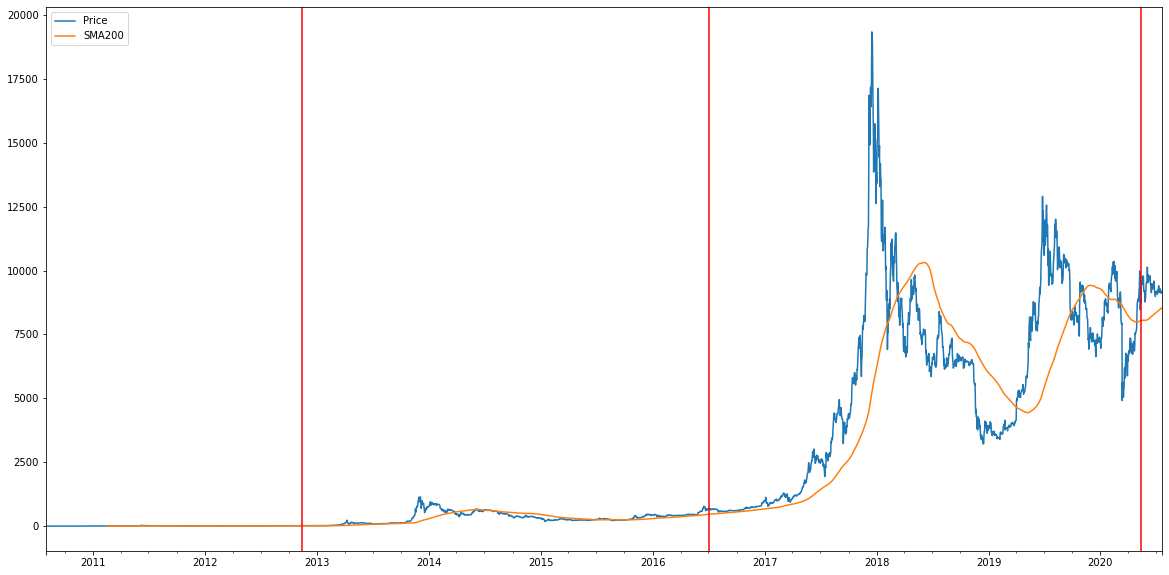

In [5]:
data[['Price', 'SMA200']].plot(figsize=(20,10))
for xc in [pd.to_datetime("2012-11-12"), pd.to_datetime("2016-07-04"), pd.to_datetime("2020-05-11")]:
    plt.axvline(x= xc, color = 'red') 

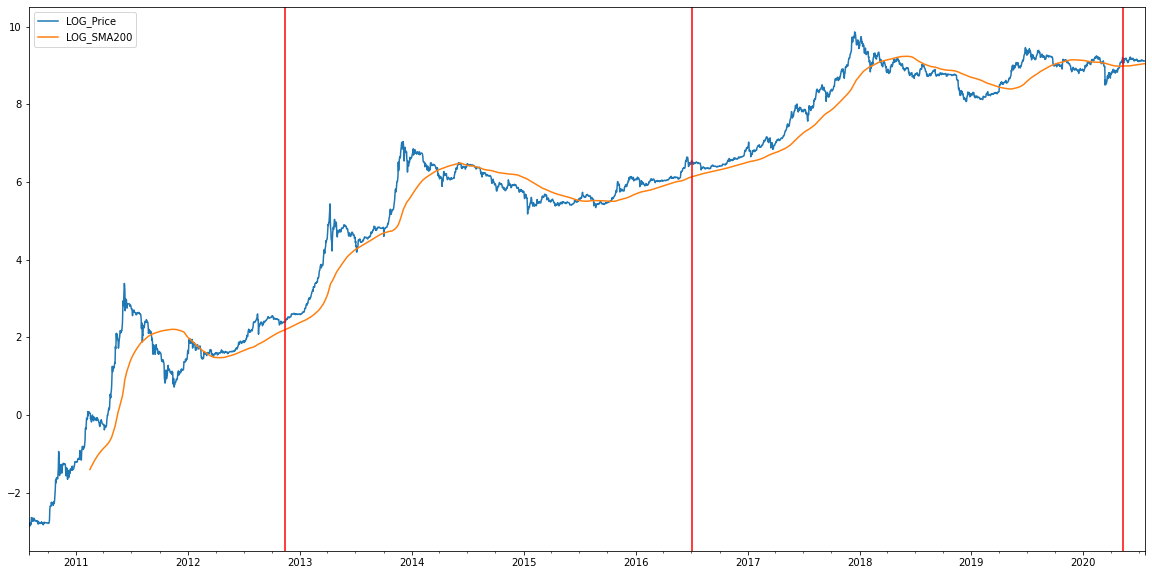

In [6]:
data[['LOG_Price', 'LOG_SMA200']].plot(figsize=(20,10))
for xc in [pd.to_datetime("2012-11-12"), pd.to_datetime("2016-07-04"), pd.to_datetime("2020-05-11")]:
    plt.axvline(x= xc, color = 'red') 